In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii 


In [21]:
data=np.loadtxt(r"C:\Users\my3166if\Desktop\Electronics\default3.csv",delimiter=",", skiprows=1)
len(data)

8192

In [32]:
time= data[:,0]
output=data[:,1:2]
inpu=data[:,2]

Text(0.5, 1.0, 'Time vs Voltage')

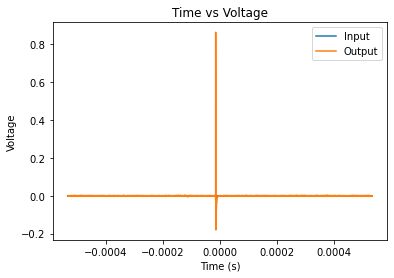

In [33]:
plt.plot(time, inpu, label='Input') 
plt.plot(time, output, label='Output')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title("Time vs Voltage")

In [34]:
#Real
data2 = np.fft.fftfreq(8192, ((np.max(time)-np.min(time))/(8192-1)))
output2 = np.real(np.fft.fft(np.fft.fftshift(output)))
inpu2 = np.real(np.fft.fft(np.fft.fftshift(inpu)))

In [35]:
#Imaginary 
output3 = np.imag(np.fft.fft(np.fft.fftshift(output)))
inpu3 = np.imag(np.fft.fft(np.fft.fftshift(inpu)))

Text(0, 0.5, 'Real Fourier Transform')

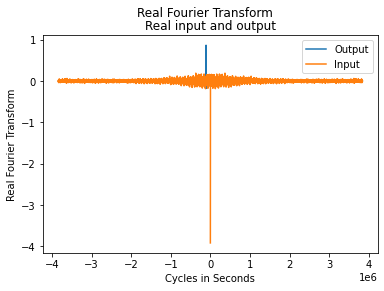

In [36]:
#Real
fig = plt.figure()
plt.plot(data2, output2, label='Output')
plt.plot(data2, inpu2, label='Input')
plt.legend()
plt.title("Real input and output")
fig.suptitle('Real Fourier Transform')
plt.xlabel('Cycles in Seconds')
plt.ylabel('Real Fourier Transform')


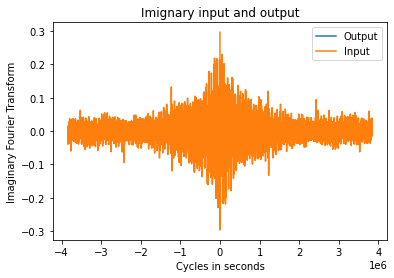

In [37]:
#Imiganary 
fig = plt.figure()
plt.plot(data2, output3, label='Output')
plt.plot(data2, inpu3, label='Input')
plt.title("Imignary input and output")
plt.xlabel('Cycles in seconds')
plt.ylabel('Imaginary Fourier Transform')
plt.legend()

Text(0, 0.5, 'Imaginary Fourier Transform')

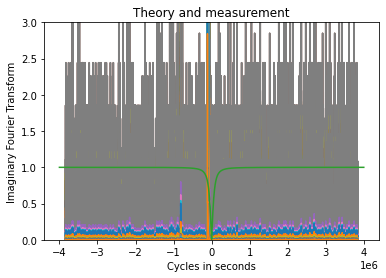

In [38]:
#Comparing magnitude of theoretical and experimental 

R = 200
C = 1*10**-8
freq = np.linspace(-4*10**6, 4*10**6, 8192)

mag = np.abs(np.fft.fft(np.fft.fftshift(output)))/np.abs(np.fft.fft(np.fft.fftshift(inpu)))
plt.close()
fig = plt.figure()
plt.plot(data2, mag, label= 'expected $|V_out/V_in|$')
plt.plot(freq, np.sqrt(R**2/(R**2+1/(2*np.pi*freq)**2/C**2)), label= 'expected $|V_out/V_in|$')
plt.title("Theory and measurement")
plt.ylim([0,3])
plt.xlabel('Cycles in seconds')
plt.ylabel('Imaginary Fourier Transform')